# Variational Bayes in Laplace

Given the random variable $x$ obey standard normal distribution，$y=\frac{1}{1+e^{-(Xw^T)}}$, which is the real distribution of $y$

## 1.  generation of data

### 1.1.  generation of  **$x$**

In [2]:
########构造x#################
from scipy.stats import multivariate_normal
import numpy as np
np.random.seed(9)####设置随机种子
n_samples = 1000####样本量
p = 10 ###样本维度
var = 3
cov = np.identity(p)*var
print(cov)####输出生成的协方差矩阵
center =np.zeros(10)
print(center)###输出生成的均值array
global data_x
data_x = multivariate_normal.rvs(mean=center, cov=cov, size=1000)
print(data_x.shape) 
print(data_x[1:10])#####输出生成的数据

[[ 3.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  3.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  3.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  3.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  3.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  3.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  3.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  3.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  3.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  3.]]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
(1000, 10)
[[  1.10139566e+00   3.01397158e+00   5.13868675e-01   1.22543229e+00
    3.15720951e+00   7.46113845e-01   2.67208609e+00  -1.56009483e+00
   -2.37507485e-01   2.24747278e+00]
 [  1.16960397e+00   5.53530823e-02   1.59027534e+00   6.59061729e-01
    8.94374723e-01  -6.15292791e-01   3.61612374e-01   5.68824669e-01
   -8.62950609e-01  -3.62306365e+00]
 [ -1.43046163e-01   4.25250110e+00  -4.62823029e+00  -1.58184612e+00
   -3.93720016e-01   4.66467916e-01   1.95801633e+00   1.80548534e+00
    2.25826593e+00   2

### 1.2. generation of  $w$ and $y$

In [47]:
######构造w和y#######
global var
var = 3
#cov = np.identity()*var
#print(cov)####输出生成的协方差矩阵
center = 0
print(center)###输出生成的均值array
w = np.random.randn(p)*np.sqrt(var)+center
print(w.shape)
print(w)
global data_y
data_y= 1/(1+np.exp(-np.dot(data_x,w)))
print(data_y[1:10])
y_prob = data_y
#maxprob = max(y_prob)
global y
y = np.zeros(1000)
for i in range(y_prob.shape[0]):
    if (y_prob[i]>0.5):
        y[i] = 1
    else:
        y[i] = 0   

0
(10,)
[ 1.36871732 -0.86246618  1.43088474 -0.63623251 -0.82763481 -1.37699557
  1.0538395   1.02938244 -1.23459252  1.81146705]
[  6.89488547e-01   2.66059608e-01   1.33514600e-02   9.98810901e-01
   1.01379955e-02   8.48600337e-01   1.57542563e-02   2.04811159e-05
   9.99999580e-01]


In [27]:
#from sklearn.datasets import load_iris
from sklearn import linear_model  
clf = linear_model.LinearRegression().fit(data_x, y)
clf.coef_

array([ 0.06356909,  0.07297328,  0.09541888,  0.0592908 ,  0.03244345,
        0.05326809,  0.08486339,  0.09697755,  0.09117789,  0.01577614])

the *coef_* (the $\hat{w}$) with logistic regression model from sklearn keeps away from the real $w$ , what we need to do is to get the distribution $p(w|X,y)$. 
According to the Gaussian mixture model(GMM), which can approximate any distribution. Let the $ g(w;\mu,\Sigma) \approx p(w|X,y)$

## 2.  Kullback–Leibler divergence(K.L.)

$$
KL = E[log\frac{g(w;\mu,\Sigma)}{p(w|X,y)}] 
= E[log\frac{g(w;\mu,\Sigma)}{\frac{p(y|X,w)p(w)}{p(y|x)}}]
= E[log\frac{g(w;\mu,\Sigma)}{p(y|X,w)p(w)}+logp(y|X)]
= E[logg(w;\mu,\Sigma) - logp(y|X,w) - logp(w)] +logp(y|X)
$$

Let the $J=E[logg(w;\mu,\Sigma) - logp(y|X,w) - logp(w)]$, what we need to do is to minimize the $J$

$$
E(logp(y|X,w)) = log[p(y_1|X,w)p(y_2|X,w)p(y_3|X,w)\cdots p(y_N|X,w)] = \sum_{n=1}^N log p(y_n|X,w)=\sum_{n=1}^N log \frac{1}{1+e^{-X^Tw}}
$$



## 3. Laplace approximate

$$
g(w;\mu,\Sigma) = log (g(\hat{w};\mu,\Sigma))+ \frac{\delta log^{'}(g(w;\mu,\Sigma))}{\delta w}|_{w=\hat{w}} \frac{(w-\hat{w})}{1!}
+ \frac{\delta log^{''}(g(w;\mu,\Sigma))}{\delta w}|_{w=\hat{w}} \frac{(w-\hat{w})^2}{2!}
$$

when $w = \hat{w}$ , the First derivative is 0. $\hat{w}$ is the value of Newton's method, So:

$$
g(w;\mu,\Sigma) = log (g(\hat{w};\mu,\Sigma))+\frac{\delta log^{''}(g(w;\mu,\Sigma))}{\delta w}|_{w=\hat{w}} \frac{(w-\hat{w})^2}{2!}
$$

Let $K = g(\hat{w};\mu,\Sigma), \mu = \hat{w}, \sigma^2 = \frac{1}{v}, v =-\frac{\delta log^{''}(g(w;\mu,\Sigma))}{\delta w}|_{w=\hat{w}}$

the g is transformed into :
$$
log (g(\hat{w};\mu,\Sigma)) = logK - \frac{(w-\mu)^2}{2v}
$$

### 3.1.  $\hat{w}$ of solution

$$
log[g(w;x,y,\sigma^2)] = log[p(y|x,w)]+log[p(w|\sigma^2)]=log[p(y=y_1|x_1,w)\cdotp(y=y_2|x_2,w)\cdots p(y=y_n|x_n,w)]+log[p(w|\sigma^2)]=\sum_{n=1}^N log[p(y = y_n|x_n,w)]+log[p(w|\sigma^2)]=\sum_{n=1}^N log[(\frac{1}{1+exp(-w^Tx_n)})^{y_n}\cdot (\frac{exp(-w^Tx_n)}{1+exp(-w^Tx_n)})^{1-y_n}]+log[p(w|\sigma^2)]
$$

Let $P_n = P(y_n = 1|w,x_n)$, the formula can be transformed as follows:

$$
log[g(w;x,y,\sigma^2)] =log[p(w|\sigma^2)] + \sum_{n=1}^Nlog [P_n^{y_n}\cdot(1-P_n)^{1-y_n}] = log[p(w|\sigma^2)] + \sum_{n=1}^N({y_n}\cdot log P_n+ (1-y_n)\cdot log(1-P_n))
$$

$D$ is defined as the dimension of $w$, the formula can be transformed as follows:
$$
log[g(w;x,y,\sigma^2)] = -\frac{D}{2}log2\pi-Dlog\sigma - \frac{1}{2\sigma^2}w^Tw+ \sum_{n=1}^N({y_n}\cdot log P_n+ (1-y_n)\cdot log(1-P_n))
$$
- **the next step is to solve for the first derivative**:
$$
\frac{\delta log[g(w;x,y,\sigma^2)]}{\delta w}= - \frac{1}{\sigma^2}w+\sum_{n=1}^N(\frac{y_n}{P_n}\frac{\delta P_n}{\delta w} - \frac{1-y_n}{1-P_n}\frac{\delta P_n}{\delta w})=- \frac{1}{\sigma^2}w+\sum_{n=1}^N x_n(y_n-P_n)
\space P_n = \frac{1}{1+exp(-w^Tx_n)}
$$
- **the next step is to solve for the second derivative**:
$$
\frac{\delta^2log[g(w;x,y,\sigma^2)]}{\delta w^2}= - \frac{1}{\sigma^2}-\sum_{n=1}^N(x_nx_n^TP_n(1-P_n))<0
$$
Because the second derivative is less than 0, the function must have a maximum. As a result, Newton method is used to solve the zero of the first derivative. Assume that $f(w) = \frac{\delta log[g(w;x,y,\sigma^2)]}{\delta w}$, $f^{(2)}(w) = \frac{\delta^2log[g(w;x,y,\sigma^2)]}{\delta w^2}$,
$$
w_{n+1} = w_n - \frac{f(w_n)}{f^{(1)}(w_n)}
$$

## My Question

- 如果$\mu$和$v$都已经可以通过泰勒展开求出来了，那么K.L散度存在的意义是什么，<div style = "color:red">KL散度看有多接近</div>
- $w$的先验概率是如何确定的.<div style = "color:red">先验概率可以先自己随便设置一个</div>

In [48]:
def delta1(w): 
    initial_w = w
    derivative1 = -(1/var)*initial_w
    temp = np.zeros(data_x.shape)
    for i in range(0,data_x.shape[0]):
        temp[i,] = data_x[i,]*(y[i]-1/(1+np.exp(-np.dot(data_x[i,],initial_w))))
    derivative1 = temp.sum(axis = 0)+derivative1
    return (derivative1)

def delta2(w):
    initial_w = w
    derivative2 = -(1/var)
    temp = np.zeros(data_x.shape)
    for i in range(0,data_x.shape[0]):
        temp[i,] = data_x[i,]*data_x[i,]*(1-1/(1+np.exp(-np.dot(data_x[i,],initial_w))))*1/(1+np.exp(-np.dot(data_x[i,],initial_w)))
    derivative2 = temp.sum(axis = 0)-derivative2
    return(derivative2)

## 4. 牛顿法

In [51]:
initial_w = np.random.randn(p)*np.sqrt(var)####利用w的先验随机生成w
wn = initial_w

In [53]:
while(True):
    wn1 = wn - delta1(wn)/delta2(wn)
    #print( delta1(wn))
    #print(delta2(wn))
    delta = wn1 - wn 
    print(delta)
    print(wn1)
    if(max(abs(delta))<0.0001):
        break
    wn = wn1

[-1.91944802 -2.61401981 -2.7657577   2.76622777 -0.17091016  3.40281223
 -1.64421812 -1.56347112 -0.1625724  -4.0682407 ]
[-2.40304808 -5.55183785 -3.69915234  4.43537905 -1.39684986  4.90603926
 -2.33644627 -2.19057727 -2.16154106 -5.64209042]
[ -6.59731577  -2.35387379  -8.61414252   9.72612074   1.29177502
  10.80950479  -4.98244433  -3.5042931    2.89283917 -12.30361209]
[ -9.00036384  -7.90571164 -12.31329486  14.16149979  -0.10507484
  15.71554405  -7.31889059  -5.69487037   0.73129811 -17.94570252]
[-17.729537     3.71578062 -22.1912841   36.98491406  11.26582984
  43.09639886 -12.29939272 -14.21241964  12.37453839 -45.90158582]
[-26.72990084  -4.18993102 -34.50457896  51.14641385  11.160755
  58.81194291 -19.61828331 -19.90729001  13.1058365  -63.84728833]
[ -91.5513906    68.34850172  -67.72074856  147.59554852   37.02460343
  154.704313    -33.10071943  -44.13551747   73.07747294 -139.32090932]
[-118.28129144   64.15857071 -102.22532752  198.74196237   48.18535843
  213.5162

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


[-3353.99590445  2412.89016759 -1883.09386837  1798.64646545  3159.41601767
  5174.79614256 -1234.80722663 -1374.4354561   4612.52193649 -4013.18846517]
[-5347.83170884  3652.47799521 -2790.42614675  2828.03338634  5247.50769108
  8328.37068402 -1811.17783897 -2131.02802776  7441.04241795 -6234.97444865]
[ -6726.38436428   4834.18451574  -3796.21869981   3588.95029775
   6291.68139008  10385.62899026  -2466.88569261  -2773.82912429
   9222.11695873  -8049.52775497]
[-12074.21607312   8486.66251095  -6586.64484656   6416.98368408
  11539.18908117  18713.99967428  -4278.06353158  -4904.85715204
  16663.15937668 -14284.50220362]
[-13439.08831837   9692.37784132  -7615.64222455   7184.15670252
  12565.64816692  20773.19506161  -4950.12405015  -5537.65435679
  18430.79527263 -16109.42971783]
[-25513.30439149  18179.04035227 -14202.28707111  13601.1403866
  24104.83724809  39487.19473589  -9228.18758173 -10442.51150883
  35093.9546493  -30393.93192146]
[-26878.30077431  19394.72911855 -15240

[ -2.25471529e+11   1.62694780e+11  -1.27847262e+11   1.20502664e+11
   2.10811571e+11   3.48403213e+11  -8.30326334e+10  -9.29220347e+10
   3.09220686e+11  -2.70343982e+11]
[ -4.50943056e+11   3.25389558e+11  -2.55694523e+11   2.41005327e+11
   4.21623141e+11   6.96806423e+11  -1.66065266e+11  -1.85844069e+11
   6.18441370e+11  -5.40687963e+11]
[ -4.50943058e+11   3.25389560e+11  -2.55694524e+11   2.41005328e+11
   4.21623142e+11   6.96806425e+11  -1.66065267e+11  -1.85844069e+11
   6.18441372e+11  -5.40687964e+11]
[ -9.01886114e+11   6.50779118e+11  -5.11389047e+11   4.82010655e+11
   8.43246283e+11   1.39361285e+12  -3.32130533e+11  -3.71688138e+11
   1.23688274e+12  -1.08137593e+12]
[ -9.01886116e+11   6.50779119e+11  -5.11389048e+11   4.82010656e+11
   8.43246284e+11   1.39361285e+12  -3.32130533e+11  -3.71688139e+11
   1.23688274e+12  -1.08137593e+12]
[ -1.80377223e+12   1.30155824e+12  -1.02277810e+12   9.64021312e+11
   1.68649257e+12   2.78722570e+12  -6.64261066e+11  -7.43376

[ -1.51311382e+19   1.09182619e+19  -8.57968452e+18   8.08679689e+18
   1.41473250e+19   2.33809438e+19  -5.57222570e+18  -6.23589219e+18
   2.07514490e+19  -1.81424775e+19]
[ -3.02622763e+19   2.18365237e+19  -1.71593690e+19   1.61735938e+19
   2.82946501e+19   4.67618876e+19  -1.11444514e+19  -1.24717844e+19
   4.15028979e+19  -3.62849551e+19]
[ -3.02622763e+19   2.18365237e+19  -1.71593690e+19   1.61735938e+19
   2.82946501e+19   4.67618876e+19  -1.11444514e+19  -1.24717844e+19
   4.15028979e+19  -3.62849551e+19]
[ -6.05245527e+19   4.36730474e+19  -3.43187381e+19   3.23471876e+19
   5.65893002e+19   9.35237752e+19  -2.22889028e+19  -2.49435687e+19
   8.30057958e+19  -7.25699101e+19]
[ -6.05245527e+19   4.36730474e+19  -3.43187381e+19   3.23471876e+19
   5.65893002e+19   9.35237752e+19  -2.22889028e+19  -2.49435687e+19
   8.30057958e+19  -7.25699101e+19]
[ -1.21049105e+20   8.73460948e+19  -6.86374762e+19   6.46943751e+19
   1.13178600e+20   1.87047550e+20  -4.45778056e+19  -4.98871

[ -5.07716747e+26   3.66356075e+26  -2.87886441e+26   2.71347876e+26
   4.74705456e+26   7.84534289e+26  -1.86972868e+26  -2.09241820e+26
   6.96303083e+26  -6.08760529e+26]
[ -1.01543349e+27   7.32712150e+26  -5.75772882e+26   5.42695753e+26
   9.49410913e+26   1.56906858e+27  -3.73945737e+26  -4.18483641e+26
   1.39260617e+27  -1.21752106e+27]
[ -1.01543349e+27   7.32712150e+26  -5.75772882e+26   5.42695753e+26
   9.49410913e+26   1.56906858e+27  -3.73945737e+26  -4.18483641e+26
   1.39260617e+27  -1.21752106e+27]
[ -2.03086699e+27   1.46542430e+27  -1.15154576e+27   1.08539151e+27
   1.89882183e+27   3.13813716e+27  -7.47891473e+26  -8.36967281e+26
   2.78521233e+27  -2.43504212e+27]
[ -2.03086699e+27   1.46542430e+27  -1.15154576e+27   1.08539151e+27
   1.89882183e+27   3.13813716e+27  -7.47891473e+26  -8.36967281e+26
   2.78521233e+27  -2.43504212e+27]
[ -4.06173397e+27   2.93084860e+27  -2.30309153e+27   2.17078301e+27
   3.79764365e+27   6.27627431e+27  -1.49578295e+27  -1.67393

[ -3.40722941e+34   2.45857400e+34  -1.93197320e+34   1.82098477e+34
   3.18569439e+34   5.26492049e+34  -1.25475368e+34  -1.40419809e+34
   4.67281089e+34  -4.08532275e+34]
[ -6.81445882e+34   4.91714800e+34  -3.86394640e+34   3.64196955e+34
   6.37138878e+34   1.05298410e+35  -2.50950736e+34  -2.80839617e+34
   9.34562178e+34  -8.17064551e+34]
[ -6.81445882e+34   4.91714800e+34  -3.86394640e+34   3.64196955e+34
   6.37138878e+34   1.05298410e+35  -2.50950736e+34  -2.80839617e+34
   9.34562178e+34  -8.17064551e+34]
[ -1.36289176e+35   9.83429600e+34  -7.72789280e+34   7.28393910e+34
   1.27427776e+35   2.10596820e+35  -5.01901472e+34  -5.61679235e+34
   1.86912436e+35  -1.63412910e+35]
[ -1.36289176e+35   9.83429600e+34  -7.72789280e+34   7.28393910e+34
   1.27427776e+35   2.10596820e+35  -5.01901472e+34  -5.61679235e+34
   1.86912436e+35  -1.63412910e+35]
[ -2.72578353e+35   1.96685920e+35  -1.54557856e+35   1.45678782e+35
   2.54855551e+35   4.21193639e+35  -1.00380294e+35  -1.12335

[ -1.14327648e+42   8.24960541e+41  -6.48262634e+41   6.11021098e+41
   1.06894166e+42   1.76661417e+42  -4.21025470e+41  -4.71170692e+41
   1.56793515e+42  -1.37080685e+42]
[ -2.28655295e+42   1.64992108e+42  -1.29652527e+42   1.22204220e+42
   2.13788332e+42   3.53322833e+42  -8.42050940e+41  -9.42341384e+41
   3.13587030e+42  -2.74161369e+42]
[ -2.28655295e+42   1.64992108e+42  -1.29652527e+42   1.22204220e+42
   2.13788332e+42   3.53322833e+42  -8.42050940e+41  -9.42341384e+41
   3.13587030e+42  -2.74161369e+42]
[ -4.57310590e+42   3.29984217e+42  -2.59305053e+42   2.44408439e+42
   4.27576663e+42   7.06645666e+42  -1.68410188e+42  -1.88468277e+42
   6.27174061e+42  -5.48322738e+42]
[ -4.57310590e+42   3.29984217e+42  -2.59305053e+42   2.44408439e+42
   4.27576663e+42   7.06645666e+42  -1.68410188e+42  -1.88468277e+42
   6.27174061e+42  -5.48322738e+42]
[ -9.14621181e+42   6.59968433e+42  -5.18610107e+42   4.88816878e+42
   8.55153326e+42   1.41329133e+43  -3.36820376e+42  -3.76936

[ -7.67239855e+49   5.53621648e+49  -4.35041689e+49   4.10049317e+49
   7.17354604e+49   1.18555470e+50  -2.82545410e+49  -3.16197299e+49
   1.05222347e+50  -9.19932902e+49]
[ -1.53447971e+50   1.10724330e+50  -8.70083378e+49   8.20098635e+49
   1.43470921e+50   2.37110940e+50  -5.65090820e+49  -6.32394598e+49
   2.10444694e+50  -1.83986580e+50]
[ -1.53447971e+50   1.10724330e+50  -8.70083378e+49   8.20098635e+49
   1.43470921e+50   2.37110940e+50  -5.65090820e+49  -6.32394598e+49
   2.10444694e+50  -1.83986580e+50]
[ -3.06895942e+50   2.21448659e+50  -1.74016676e+50   1.64019727e+50
   2.86941841e+50   4.74221879e+50  -1.13018164e+50  -1.26478920e+50
   4.20889388e+50  -3.67973161e+50]
[ -3.06895942e+50   2.21448659e+50  -1.74016676e+50   1.64019727e+50
   2.86941841e+50   4.74221879e+50  -1.13018164e+50  -1.26478920e+50
   4.20889388e+50  -3.67973161e+50]
[ -6.13791884e+50   4.42897318e+50  -3.48033351e+50   3.28039454e+50
   5.73883683e+50   9.48443759e+50  -2.26036328e+50  -2.52957

   2.82454087e+58  -2.46942608e+58]
[ -4.11908761e+58   2.97223359e+58  -2.33561228e+58   2.20143551e+58
   3.85126820e+58   6.36489832e+58  -1.51690412e+58  -1.69757132e+58
   5.64908173e+58  -4.93885216e+58]
[ -4.11908761e+58   2.97223359e+58  -2.33561228e+58   2.20143551e+58
   3.85126820e+58   6.36489832e+58  -1.51690412e+58  -1.69757132e+58
   5.64908173e+58  -4.93885216e+58]
[ -8.23817522e+58   5.94446718e+58  -4.67122457e+58   4.40287102e+58
   7.70253640e+58   1.27297966e+59  -3.03380824e+58  -3.39514265e+58
   1.12981635e+59  -9.87770432e+58]
[ -8.23817522e+58   5.94446718e+58  -4.67122457e+58   4.40287102e+58
   7.70253640e+58   1.27297966e+59  -3.03380824e+58  -3.39514265e+58
   1.12981635e+59  -9.87770432e+58]
[ -1.64763504e+59   1.18889344e+59  -9.34244914e+58   8.80574204e+58
   1.54050728e+59   2.54595933e+59  -6.06761648e+58  -6.79028529e+58
   2.25963269e+59  -1.97554086e+59]
[ -1.64763504e+59   1.18889344e+59  -9.34244914e+58   8.80574204e+58
   1.54050728e+59   2.545

[ -1.38213645e+66   9.97316099e+65  -7.83701436e+65   7.38679181e+65
   1.29227117e+66   2.13570548e+66  -5.08988562e+65  -5.69610415e+65
   1.89551729e+66  -1.65720379e+66]
[ -2.76427290e+66   1.99463220e+66  -1.56740287e+66   1.47735836e+66
   2.58454234e+66   4.27141096e+66  -1.01797712e+66  -1.13922083e+66
   3.79103458e+66  -3.31440758e+66]
[ -2.76427290e+66   1.99463220e+66  -1.56740287e+66   1.47735836e+66
   2.58454234e+66   4.27141096e+66  -1.01797712e+66  -1.13922083e+66
   3.79103458e+66  -3.31440758e+66]
[ -5.52854580e+66   3.98926439e+66  -3.13480574e+66   2.95471673e+66
   5.16908468e+66   8.54282191e+66  -2.03595425e+66  -2.27844166e+66
   7.58206915e+66  -6.62881516e+66]
[ -5.52854580e+66   3.98926439e+66  -3.13480574e+66   2.95471673e+66
   5.16908468e+66   8.54282191e+66  -2.03595425e+66  -2.27844166e+66
   7.58206915e+66  -6.62881516e+66]
[ -1.10570916e+67   7.97852879e+66  -6.26961149e+66   5.90943345e+66
   1.03381694e+67   1.70856438e+67  -4.07190849e+66  -4.55688

[ -4.63768035e+73   3.34643752e+73  -2.62966565e+73   2.47859604e+73
   4.33614251e+73   7.16623843e+73  -1.70788221e+73  -1.91129539e+73
   6.36030060e+73  -5.56065319e+73]
[ -9.27536071e+73   6.69287504e+73  -5.25933131e+73   4.95719207e+73
   8.67228502e+73   1.43324769e+74  -3.41576442e+73  -3.82259079e+73
   1.27206012e+74  -1.11213064e+74]
[ -9.27536071e+73   6.69287504e+73  -5.25933131e+73   4.95719207e+73
   8.67228502e+73   1.43324769e+74  -3.41576442e+73  -3.82259079e+73
   1.27206012e+74  -1.11213064e+74]
[ -1.85507214e+74   1.33857501e+74  -1.05186626e+74   9.91438414e+73
   1.73445700e+74   2.86649537e+74  -6.83152883e+73  -7.64518158e+73
   2.54412024e+74  -2.22426127e+74]
[ -1.85507214e+74   1.33857501e+74  -1.05186626e+74   9.91438414e+73
   1.73445700e+74   2.86649537e+74  -6.83152883e+73  -7.64518158e+73
   2.54412024e+74  -2.22426127e+74]
[ -3.71014428e+74   2.67715002e+74  -2.10373252e+74   1.98287683e+74
   3.46891401e+74   5.73299074e+74  -1.36630577e+74  -1.52903

[ -3.11229460e+81   2.24575620e+81  -1.76473875e+81   1.66335764e+81
   2.90993598e+81   4.80918120e+81  -1.14614035e+81  -1.28264863e+81
   4.26832548e+81  -3.73169118e+81]
[ -6.22458920e+81   4.49151241e+81  -3.52947749e+81   3.32671529e+81
   5.81987196e+81   9.61836240e+81  -2.29228070e+81  -2.56529725e+81
   8.53665096e+81  -7.46338237e+81]
[ -6.22458920e+81   4.49151241e+81  -3.52947749e+81   3.32671529e+81
   5.81987196e+81   9.61836240e+81  -2.29228070e+81  -2.56529725e+81
   8.53665096e+81  -7.46338237e+81]
[ -1.24491784e+82   8.98302482e+81  -7.05895499e+81   6.65343057e+81
   1.16397439e+82   1.92367248e+82  -4.58456139e+81  -5.13059451e+81
   1.70733019e+82  -1.49267647e+82]
[ -1.24491784e+82   8.98302482e+81  -7.05895499e+81   6.65343057e+81
   1.16397439e+82   1.92367248e+82  -4.58456139e+81  -5.13059451e+81
   1.70733019e+82  -1.49267647e+82]
[ -2.48983568e+82   1.79660496e+82  -1.41179100e+82   1.33068611e+82
   2.32794878e+82   3.84734496e+82  -9.16912278e+81  -1.02611

[ -1.04431278e+89   7.53550739e+88  -5.92148063e+88   5.58130209e+88
   9.76412490e+88   1.61369344e+89  -3.84580884e+88  -4.30385461e+88
   1.43221237e+89  -1.25214778e+89]
[ -2.08862555e+89   1.50710148e+89  -1.18429613e+89   1.11626042e+89
   1.95282498e+89   3.22738687e+89  -7.69161767e+88  -8.60770922e+88
   2.86442474e+89  -2.50429556e+89]
[ -2.08862555e+89   1.50710148e+89  -1.18429613e+89   1.11626042e+89
   1.95282498e+89   3.22738687e+89  -7.69161767e+88  -8.60770922e+88
   2.86442474e+89  -2.50429556e+89]
[ -4.17725110e+89   3.01420295e+89  -2.36859225e+89   2.23252084e+89
   3.90564996e+89   6.45477374e+89  -1.53832353e+89  -1.72154184e+89
   5.72884948e+89  -5.00859112e+89]
[ -4.17725110e+89   3.01420295e+89  -2.36859225e+89   2.23252084e+89
   3.90564996e+89   6.45477374e+89  -1.53832353e+89  -1.72154184e+89
   5.72884948e+89  -5.00859112e+89]
[ -8.35450221e+89   6.02840591e+89  -4.73718450e+89   4.46504167e+89
   7.81129992e+89   1.29095475e+90  -3.07664707e+89  -3.44308

[ -3.50413220e+96   2.52849670e+96  -1.98691919e+96   1.87277422e+96
   3.27629665e+96   5.41465666e+96  -1.29043931e+96  -1.44413397e+96
   4.80570726e+96  -4.20151076e+96]
[ -7.00826440e+96   5.05699340e+96  -3.97383838e+96   3.74554843e+96
   6.55259330e+96   1.08293133e+97  -2.58087862e+96  -2.88826794e+96
   9.61141452e+96  -8.40302151e+96]
[ -7.00826440e+96   5.05699340e+96  -3.97383838e+96   3.74554843e+96
   6.55259330e+96   1.08293133e+97  -2.58087862e+96  -2.88826794e+96
   9.61141452e+96  -8.40302151e+96]
[ -1.40165288e+97   1.01139868e+97  -7.94767676e+96   7.49109686e+96
   1.31051866e+97   2.16586267e+97  -5.16175724e+96  -5.77653588e+96
   1.92228290e+97  -1.68060430e+97]
[ -1.40165288e+97   1.01139868e+97  -7.94767676e+96   7.49109686e+96
   1.31051866e+97   2.16586267e+97  -5.16175724e+96  -5.77653588e+96
   1.92228290e+97  -1.68060430e+97]
[ -2.80330576e+97   2.02279736e+97  -1.58953535e+97   1.49821937e+97
   2.62103732e+97   4.33172533e+97  -1.03235145e+97  -1.15530

[ -1.17579166e+104   8.48422706e+103  -6.66699449e+103   6.28398750e+103
   1.09934273e+104   1.81685729e+104  -4.32999581e+103  -4.84570951e+103
   1.61252777e+104  -1.40979307e+104]
[ -2.35158331e+104   1.69684541e+104  -1.33339890e+104   1.25679750e+104
   2.19868546e+104   3.63371458e+104  -8.65999162e+103  -9.69141901e+103
   3.22505555e+104  -2.81958614e+104]
[ -2.35158331e+104   1.69684541e+104  -1.33339890e+104   1.25679750e+104
   2.19868546e+104   3.63371458e+104  -8.65999162e+103  -9.69141901e+103
   3.22505555e+104  -2.81958614e+104]
[ -4.70316663e+104   3.39369083e+104  -2.66679780e+104   2.51359500e+104
   4.39737092e+104   7.26742915e+104  -1.73199832e+104  -1.93828380e+104
   6.45011110e+104  -5.63917228e+104]
[ -4.70316663e+104   3.39369083e+104  -2.66679780e+104   2.51359500e+104
   4.39737092e+104   7.26742915e+104  -1.73199832e+104  -1.93828380e+104
   6.45011110e+104  -5.63917228e+104]
[ -9.40633326e+104   6.78738165e+104  -5.33359559e+104   5.02719000e+104
   8.79

[ -3.94530212e+111   2.84683420e+111  -2.23707213e+111   2.10855631e+111
   3.68878209e+111   6.09636143e+111  -1.45290550e+111  -1.62595030e+111
   5.41074535e+111  -4.73048057e+111]
[ -7.89060424e+111   5.69366840e+111  -4.47414426e+111   4.21711263e+111
   7.37756418e+111   1.21927229e+112  -2.90581100e+111  -3.25190060e+111
   1.08214907e+112  -9.46096114e+111]
[ -7.89060424e+111   5.69366840e+111  -4.47414426e+111   4.21711263e+111
   7.37756418e+111   1.21927229e+112  -2.90581100e+111  -3.25190060e+111
   1.08214907e+112  -9.46096114e+111]
[ -1.57812085e+112   1.13873368e+112  -8.94828853e+111   8.43422526e+111
   1.47551284e+112   2.43854457e+112  -5.81162200e+111  -6.50380121e+111
   2.16429814e+112  -1.89219223e+112]
[ -1.57812085e+112   1.13873368e+112  -8.94828853e+111   8.43422526e+111
   1.47551284e+112   2.43854457e+112  -5.81162200e+111  -6.50380121e+111
   2.16429814e+112  -1.89219223e+112]
[ -3.15624170e+112   2.27746736e+112  -1.78965771e+112   1.68684505e+112
   2.95

[ -1.32382372e+119   9.55239046e+118  -7.50636847e+118   7.07514095e+118
   1.23774988e+119   2.04559945e+119  -4.87514188e+118  -5.45578388e+118
   1.81554487e+119  -1.58728589e+119]
[ -2.64764743e+119   1.91047809e+119  -1.50127369e+119   1.41502819e+119
   2.47549976e+119   4.09119890e+119  -9.75028376e+118  -1.09115678e+119
   3.63108974e+119  -3.17457177e+119]
[ -2.64764743e+119   1.91047809e+119  -1.50127369e+119   1.41502819e+119
   2.47549976e+119   4.09119890e+119  -9.75028376e+118  -1.09115678e+119
   3.63108974e+119  -3.17457177e+119]
[ -5.29529487e+119   3.82095618e+119  -3.00254739e+119   2.83005638e+119
   4.95099951e+119   8.18239781e+119  -1.95005675e+119  -2.18231355e+119
   7.26217948e+119  -6.34914354e+119]
[ -5.29529487e+119   3.82095618e+119  -3.00254739e+119   2.83005638e+119
   4.95099951e+119   8.18239781e+119  -1.95005675e+119  -2.18231355e+119
   7.26217948e+119  -6.34914354e+119]
[ -1.05905897e+120   7.64191237e+119  -6.00509478e+119   5.66011276e+119
   9.90

[ -4.44201529e+126   3.20525036e+126  -2.51871930e+126   2.37402336e+126
   4.15319941e+126   6.86389277e+126  -1.63582617e+126  -1.83065729e+126
   6.09195769e+126  -5.32604763e+126]
[ -8.88403058e+126   6.41050072e+126  -5.03743861e+126   4.74804672e+126
   8.30639883e+126   1.37277855e+127  -3.27165233e+126  -3.66131459e+126
   1.21839154e+127  -1.06520953e+127]
[ -8.88403058e+126   6.41050072e+126  -5.03743861e+126   4.74804672e+126
   8.30639883e+126   1.37277855e+127  -3.27165233e+126  -3.66131459e+126
   1.21839154e+127  -1.06520953e+127]
[ -1.77680612e+127   1.28210014e+127  -1.00748772e+127   9.49609343e+126
   1.66127977e+127   2.74555711e+127  -6.54330467e+126  -7.32262917e+126
   2.43678308e+127  -2.13041905e+127]
[ -1.77680612e+127   1.28210014e+127  -1.00748772e+127   9.49609343e+126
   1.66127977e+127   2.74555711e+127  -6.54330467e+126  -7.32262917e+126
   2.43678308e+127  -2.13041905e+127]
[ -3.55361223e+127   2.56420029e+127  -2.01497544e+127   1.89921869e+127
   3.32

   2.04412180e+134  -1.78712503e+134]
[ -2.98098600e+134   2.15100711e+134  -1.69028391e+134   1.59318011e+134
   2.78716495e+134   4.60628046e+134  -1.09778436e+134  -1.22853331e+134
   4.08824360e+134  -3.57425006e+134]
[ -2.98098600e+134   2.15100711e+134  -1.69028391e+134   1.59318011e+134
   2.78716495e+134   4.60628046e+134  -1.09778436e+134  -1.22853331e+134
   4.08824360e+134  -3.57425006e+134]
[ -5.96197200e+134   4.30201421e+134  -3.38056783e+134   3.18636021e+134
   5.57432989e+134   9.21256093e+134  -2.19556872e+134  -2.45706663e+134
   8.17648720e+134  -7.14850012e+134]
[ -5.96197200e+134   4.30201421e+134  -3.38056783e+134   3.18636021e+134
   5.57432989e+134   9.21256093e+134  -2.19556872e+134  -2.45706663e+134
   8.17648720e+134  -7.14850012e+134]
[ -1.19239440e+135   8.60402842e+134  -6.76113565e+134   6.37272043e+134
   1.11486598e+135   1.84251219e+135  -4.39113743e+134  -4.91413325e+134
   1.63529744e+135  -1.42970002e+135]
[ -1.19239440e+135   8.60402842e+134  -6.7

[ -4.00101168e+142   2.88703287e+142  -2.26866066e+142   2.13833014e+142
   3.74086947e+142   6.18244498e+142  -1.47342122e+142  -1.64890950e+142
   5.48714768e+142  -4.79727723e+142]
[ -8.00202336e+142   5.77406573e+142  -4.53732133e+142   4.27666028e+142
   7.48173893e+142   1.23648900e+143  -2.94684245e+142  -3.29781900e+142
   1.09742954e+143  -9.59455445e+142]
[ -8.00202336e+142   5.77406573e+142  -4.53732133e+142   4.27666028e+142
   7.48173893e+142   1.23648900e+143  -2.94684245e+142  -3.29781900e+142
   1.09742954e+143  -9.59455445e+142]
[ -1.60040467e+143   1.15481315e+143  -9.07464266e+142   8.55332057e+142
   1.49634779e+143   2.47297799e+143  -5.89368489e+142  -6.59563800e+142
   2.19485907e+143  -1.91891089e+143]
[ -1.60040467e+143   1.15481315e+143  -9.07464266e+142   8.55332057e+142
   1.49634779e+143   2.47297799e+143  -5.89368489e+142  -6.59563800e+142
   2.19485907e+143  -1.91891089e+143]
[ -3.20080934e+143   2.30962629e+143  -1.81492853e+143   1.71066411e+143
   2.99

[ -1.34251674e+150   9.68727480e+149  -7.61236200e+149   7.17504533e+149
   1.25522750e+150   2.07448430e+150  -4.94398122e+149  -5.53282217e+149
   1.84118124e+150  -1.60969912e+150]
[ -2.68503349e+150   1.93745496e+150  -1.52247240e+150   1.43500907e+150
   2.51045500e+150   4.14896860e+150  -9.88796245e+149  -1.10656443e+150
   3.68236247e+150  -3.21939825e+150]
[ -2.68503349e+150   1.93745496e+150  -1.52247240e+150   1.43500907e+150
   2.51045500e+150   4.14896860e+150  -9.88796245e+149  -1.10656443e+150
   3.68236247e+150  -3.21939825e+150]
[ -5.37006697e+150   3.87490992e+150  -3.04494480e+150   2.87001813e+150
   5.02091001e+150   8.29793719e+150  -1.97759249e+150  -2.21312887e+150
   7.36472494e+150  -6.43879650e+150]
[ -5.37006697e+150   3.87490992e+150  -3.04494480e+150   2.87001813e+150
   5.02091001e+150   8.29793719e+150  -1.97759249e+150  -2.21312887e+150
   7.36472494e+150  -6.43879650e+150]
[ -1.07401339e+151   7.74981984e+150  -6.08988960e+150   5.74003627e+150
   1.00

[ -4.50473868e+157   3.25051004e+157  -2.55428483e+157   2.40754571e+157
   4.21184458e+157   6.96081423e+157  -1.65892482e+157  -1.85650705e+157
   6.17797906e+157  -5.40125398e+157]
[ -9.00947736e+157   6.50102007e+157  -5.10856966e+157   4.81509142e+157
   8.42368917e+157   1.39216285e+158  -3.31784964e+157  -3.71301411e+157
   1.23559581e+158  -1.08025080e+158]
[ -9.00947736e+157   6.50102007e+157  -5.10856966e+157   4.81509142e+157
   8.42368917e+157   1.39216285e+158  -3.31784964e+157  -3.71301411e+157
   1.23559581e+158  -1.08025080e+158]
[ -1.80189547e+158   1.30020401e+158  -1.02171393e+158   9.63018283e+157
   1.68473783e+158   2.78432569e+158  -6.63569927e+157  -7.42602821e+157
   2.47119162e+158  -2.16050159e+158]
[ -1.80189547e+158   1.30020401e+158  -1.02171393e+158   9.63018283e+157
   1.68473783e+158   2.78432569e+158  -6.63569927e+157  -7.42602821e+157
   2.47119162e+158  -2.16050159e+158]
[ -3.60379094e+158   2.60040803e+158  -2.04342786e+158   1.92603657e+158
   3.36

[ -1.51153948e+165   1.09069018e+165  -8.57075767e+164   8.07838287e+164
   1.41326053e+165   2.33566168e+165  -5.56642800e+164  -6.22940397e+164
   2.07298578e+165  -1.81236009e+165]
[ -3.02307895e+165   2.18138036e+165  -1.71415153e+165   1.61567657e+165
   2.82652105e+165   4.67132336e+165  -1.11328560e+165  -1.24588079e+165
   4.14597156e+165  -3.62472019e+165]
[ -3.02307895e+165   2.18138036e+165  -1.71415153e+165   1.61567657e+165
   2.82652105e+165   4.67132336e+165  -1.11328560e+165  -1.24588079e+165
   4.14597156e+165  -3.62472019e+165]
[ -6.04615791e+165   4.36276072e+165  -3.42830307e+165   3.23135315e+165
   5.65304211e+165   9.34264671e+165  -2.22657120e+165  -2.49176159e+165
   8.29194313e+165  -7.24944038e+165]
[ -6.04615791e+165   4.36276072e+165  -3.42830307e+165   3.23135315e+165
   5.65304211e+165   9.34264671e+165  -2.22657120e+165  -2.49176159e+165
   8.29194313e+165  -7.24944038e+165]
[ -1.20923158e+166   8.72552144e+165  -6.85660613e+165   6.46270630e+165
   1.13

[ -5.07188486e+172   3.65974895e+172  -2.87586905e+172   2.71065549e+172
   4.74211542e+172   7.83718010e+172  -1.86778330e+172  -2.09024112e+172
   6.95578605e+172  -6.08127135e+172]
[ -1.01437697e+173   7.31949789e+172  -5.75173811e+172   5.42131098e+172
   9.48423085e+172   1.56743602e+173  -3.73556660e+172  -4.18048224e+172
   1.39115721e+173  -1.21625427e+173]
[ -1.01437697e+173   7.31949789e+172  -5.75173811e+172   5.42131098e+172
   9.48423085e+172   1.56743602e+173  -3.73556660e+172  -4.18048224e+172
   1.39115721e+173  -1.21625427e+173]
[ -2.02875394e+173   1.46389958e+173  -1.15034762e+173   1.08426220e+173
   1.89684617e+173   3.13487204e+173  -7.47113319e+172  -8.36096447e+172
   2.78231442e+173  -2.43250854e+173]
[ -2.02875394e+173   1.46389958e+173  -1.15034762e+173   1.08426220e+173
   1.89684617e+173   3.13487204e+173  -7.47113319e+172  -8.36096447e+172
   2.78231442e+173  -2.43250854e+173]
[ -4.05750789e+173   2.92779916e+173  -2.30069524e+173   2.16852439e+173
   3.79

[ -1.70184216e+180   1.22800797e+180  -9.64981526e+179   9.09545052e+179
   1.59118990e+180   2.62972127e+180  -6.26724077e+179  -7.01368535e+179
   2.33397450e+180  -2.04053606e+180]
[ -3.40368431e+180   2.45601594e+180  -1.92996305e+180   1.81909010e+180
   3.18237979e+180   5.25944253e+180  -1.25344815e+180  -1.40273707e+180
   4.66794900e+180  -4.08107212e+180]
[ -3.40368431e+180   2.45601594e+180  -1.92996305e+180   1.81909010e+180
   3.18237979e+180   5.25944253e+180  -1.25344815e+180  -1.40273707e+180
   4.66794900e+180  -4.08107212e+180]
[ -6.80736862e+180   4.91203189e+180  -3.85992610e+180   3.63818021e+180
   6.36475958e+180   1.05188851e+181  -2.50689631e+180  -2.80547414e+180
   9.33589799e+180  -8.16214425e+180]
[ -6.80736862e+180   4.91203189e+180  -3.85992610e+180   3.63818021e+180
   6.36475958e+180   1.05188851e+181  -2.50689631e+180  -2.80547414e+180
   9.33589799e+180  -8.16214425e+180]
[ -1.36147372e+181   9.82406377e+180  -7.71985221e+180   7.27636042e+180
   1.27

[ -5.71043469e+187   4.12051100e+187  -3.23794070e+187   3.05192676e+187
   5.33914731e+187   8.82388034e+187  -2.10293704e+187  -2.35340228e+187
   7.83151886e+187  -6.84690285e+187]
[ -1.14208694e+188   8.24102200e+187  -6.47588140e+187   6.10385352e+187
   1.06782946e+188   1.76477607e+188  -4.20587408e+187  -4.70680456e+187
   1.56630377e+188  -1.36938057e+188]
[ -1.14208694e+188   8.24102200e+187  -6.47588140e+187   6.10385352e+187
   1.06782946e+188   1.76477607e+188  -4.20587408e+187  -4.70680456e+187
   1.56630377e+188  -1.36938057e+188]
[ -2.28417388e+188   1.64820440e+188  -1.29517628e+188   1.22077070e+188
   2.13565893e+188   3.52955214e+188  -8.41174817e+187  -9.41360912e+187
   3.13260754e+188  -2.73876114e+188]
[ -2.28417388e+188   1.64820440e+188  -1.29517628e+188   1.22077070e+188
   2.13565893e+188   3.52955214e+188  -8.41174817e+187  -9.41360912e+187
   3.13260754e+188  -2.73876114e+188]
[ -4.56834775e+188   3.29640880e+188  -2.59035256e+188   2.44154141e+188
   4.27

[ -1.91610392e+195   1.38261406e+195  -1.08647261e+195   1.02405669e+195
   1.79152055e+195   2.96080293e+195  -7.05628580e+194  -7.89670768e+194
   2.62782167e+195  -2.29743936e+195]
[ -3.83220785e+195   2.76522812e+195  -2.17294522e+195   2.04811338e+195
   3.58304111e+195   5.92160586e+195  -1.41125716e+195  -1.57934154e+195
   5.25564334e+195  -4.59487872e+195]
[ -3.83220785e+195   2.76522812e+195  -2.17294522e+195   2.04811338e+195
   3.58304111e+195   5.92160586e+195  -1.41125716e+195  -1.57934154e+195
   5.25564334e+195  -4.59487872e+195]
[ -7.66441570e+195   5.53045624e+195  -4.34589044e+195   4.09622676e+195
   7.16608222e+195   1.18432117e+196  -2.82251432e+195  -3.15868307e+195
   1.05112867e+196  -9.18975745e+195]
[ -7.66441570e+195   5.53045624e+195  -4.34589044e+195   4.09622676e+195
   7.16608222e+195   1.18432117e+196  -2.82251432e+195  -3.15868307e+195
   1.05112867e+196  -9.18975745e+195]
[ -1.53288314e+196   1.10609125e+196  -8.69178088e+195   8.19245352e+195
   1.43

   8.81750636e+202  -7.70892728e+202]
[ -1.28587558e+203   9.27856590e+202  -7.29119426e+202   6.87232811e+202
   1.20226909e+203   1.98696121e+203  -4.73539324e+202  -5.29939082e+202
   1.76350127e+203  -1.54178546e+203]
[ -1.28587558e+203   9.27856590e+202  -7.29119426e+202   6.87232811e+202
   1.20226909e+203   1.98696121e+203  -4.73539324e+202  -5.29939082e+202
   1.76350127e+203  -1.54178546e+203]
[ -2.57175115e+203   1.85571318e+203  -1.45823885e+203   1.37446562e+203
   2.40453819e+203   3.97392242e+203  -9.47078648e+202  -1.05987816e+203
   3.52700254e+203  -3.08357091e+203]
[ -2.57175115e+203   1.85571318e+203  -1.45823885e+203   1.37446562e+203
   2.40453819e+203   3.97392242e+203  -9.47078648e+202  -1.05987816e+203
   3.52700254e+203  -3.08357091e+203]
[ -5.14350231e+203   3.71142636e+203  -2.91647771e+203   2.74893124e+203
   4.80907637e+203   7.94784484e+203  -1.89415730e+203  -2.11975633e+203
   7.05400508e+203  -6.16714183e+203]
[ -5.14350231e+203   3.71142636e+203  -2.9

KeyboardInterrupt: 

python 优化函数。|

## 5. 梯度下降

In [196]:
import itertools

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])

In [197]:
def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    plt.xlim(-9., 5.)
    plt.ylim(-3., 6.)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)

In [198]:

# Number of samples per component
n_samples = 500

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0., -0.1], [1.7, .4]])
X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
          .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]

In [199]:
# Fit a Gaussian mixture with EM using five components
gmm = mixture.GaussianMixture(n_components=5, covariance_type='full').fit(X)

D:\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


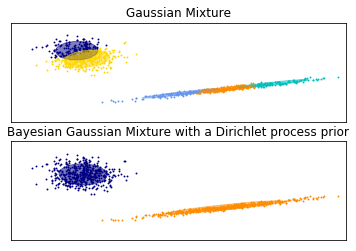

In [200]:
plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_, 0,
             'Gaussian Mixture')
# Fit a Dirichlet process Gaussian mixture using five components
dpgmm = mixture.BayesianGaussianMixture(n_components=5,
                                        covariance_type='full').fit(X)
plot_results(X, dpgmm.predict(X), dpgmm.means_, dpgmm.covariances_, 1,
             'Bayesian Gaussian Mixture with a Dirichlet process prior')
plt.show()

In [52]:
dpgmm.means_

array([[ -5.97878326e+00,   3.00076669e+00],
       [ -3.04824425e+00,   1.51571998e+00],
       [ -3.04816872e+00,   1.51568575e+00],
       [ -3.04841758e+00,   1.51580487e+00],
       [ -4.86789592e-02,  -5.20790518e-04]])

In [53]:
dpgmm.covariance_prior_

array([[ 10.51401566,  -4.13489296],
       [ -4.13489296,   2.57580056]])

In [59]:
dpgmm.mean_prior_

array([-3.01371312,  1.50010815])